# HW2

**Objective:** 
* *visualizing participants' time zone information in a clinical study （e.g., using heatmap or other techniques that you feel that can accomplish the objective)*

**Data sets:**
1. subject_registry.csv (this file contains participant information, including ***datat_collection_started*** time for each of them)
2. subject_timezone_log.csv (this file contains the collected ***time zone log*** from participants' devices)

**Requirements:**
* Only participants belonging to cohort ***BP03*** are to be analyzed and visualized
* Only participants at a valid visit phase (e.g., ***Complete***, ***V1***, ***V2***, .... ***V8***) are to be analyzed and  visualized
* Each participant is defined to be in the study for **66 days** (first day defined in *subject_registry.csv*)
* You will extract and further derive each participant's time zone at **hour level** over his/her 66 days (participants might travels across multiple time zones in a day)




In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_subject = pd.read_csv('https://raw.githubusercontent.com/huizhangky/CSE590/main/hw/hw2/subject_registry.csv')

print(df_subject.head(10))

   Site  SubjectID   ISA Actual_Visit Data_collection_started
0   100      11609   NaN           SF                3-Aug-21
1   100      12140  NP03     Complete               10-Aug-21
2   100      12120  BP03     Complete               11-Aug-21
3   100      11806  BP03     Complete               12-Aug-21
4   100      11653  BP03           ED               12-Aug-21
5   100      11530  BP03     Complete               25-Aug-21
6   102      12629  BP03           ED               14-Oct-21
7   102      12902  BP03           V3                3-Dec-21
8   103      12452  NP03           ED               23-Aug-21
9   103      12638  BP03           ED                7-Oct-21


In [9]:
df_subject_tzlog = pd.read_csv('https://raw.githubusercontent.com/huizhangky/CSE590/main/hw/hw2/subject_timezone_log.csv')

print(df_subject_tzlog.head(10))

   Site  subject         timestamp_iso  time_offset timezone_location
0   100    11530  2021-08-25T12:50:30Z       -14400  America/New_York
1   100    11530  2021-09-15T13:27:10Z       -14400  America/New_York
2   100    11609  2021-08-03T14:23:43Z       -14400  America/New_York
3   100    11653  2021-08-12T13:52:45Z       -14400  America/New_York
4   100    11806  2021-08-12T13:38:02Z       -14400  America/New_York
5   100    12120  2021-08-11T18:08:50Z       -14400  America/New_York
6   100    12140  2021-08-10T15:34:46Z       -14400  America/New_York
7   102    12629  2021-10-14T15:14:40Z       -14400  America/New_York
8   102    12902  2021-12-03T15:04:34Z       -18000  America/New_York
9   103    12452  2021-08-23T18:28:11Z       -14400  America/New_York


**some useful code segments**

In [10]:
BP03_df = df_subject[df_subject['ISA'] == "BP03"].copy()

In [11]:
BP03_df["Data_collection_started"] = pd.to_datetime(BP03_df['Data_collection_started'])

In [12]:
BP03_df["Data_collection_ended"] = pd.to_datetime(BP03_df['Data_collection_started']) + pd.DateOffset(days=65)

In [13]:
BP03_df.head(10)

,Site,SubjectID,ISA,Actual_Visit,Data_collection_started,Data_collection_ended
2,100,12120,BP03,Complete,2021-08-11,2021-10-15
3,100,11806,BP03,Complete,2021-08-12,2021-10-16
4,100,11653,BP03,ED,2021-08-12,2021-10-16
5,100,11530,BP03,Complete,2021-08-25,2021-10-29
6,102,12629,BP03,ED,2021-10-14,2021-12-18
7,102,12902,BP03,V3,2021-12-03,2022-02-06
9,103,12638,BP03,ED,2021-10-07,2021-12-11
12,106,12401,BP03,Complete,2021-08-09,2021-10-13
13,106,12328,BP03,Complete,2021-08-09,2021-10-13
14,106,12518,BP03,Complete,2021-09-09,2021-11-13


**Let me show you how the participants are enrolled and progressed in the study using Gann Chart**

In [14]:
study_start = BP03_df.Data_collection_started.min()

BP03_df['start_num'] = (BP03_df.Data_collection_started - study_start).dt.days
BP03_df['end_num'] = (BP03_df.Data_collection_ended - study_start).dt.days
BP03_df['days_start_to_end'] = BP03_df.end_num - BP03_df.start_num
BP03_df

,Site,SubjectID,ISA,Actual_Visit,Data_collection_started,Data_collection_ended,start_num,end_num,days_start_to_end
2,100,12120,BP03,Complete,2021-08-11,2021-10-15,85,150,65
3,100,11806,BP03,Complete,2021-08-12,2021-10-16,86,151,65
4,100,11653,BP03,ED,2021-08-12,2021-10-16,86,151,65
5,100,11530,BP03,Complete,2021-08-25,2021-10-29,99,164,65
6,102,12629,BP03,ED,2021-10-14,2021-12-18,149,214,65
...,...,...,...,...,...,...,...,...,...
277,147,12584,BP03,Complete,2021-09-27,2021-12-01,132,197,65
278,147,12595,BP03,Complete,2021-09-23,2021-11-27,128,193,65
279,147,12572,BP03,ED,2021-10-07,2021-12-11,142,207,65
282,147,12654,BP03,Complete,2021-10-21,2021-12-25,156,221,65


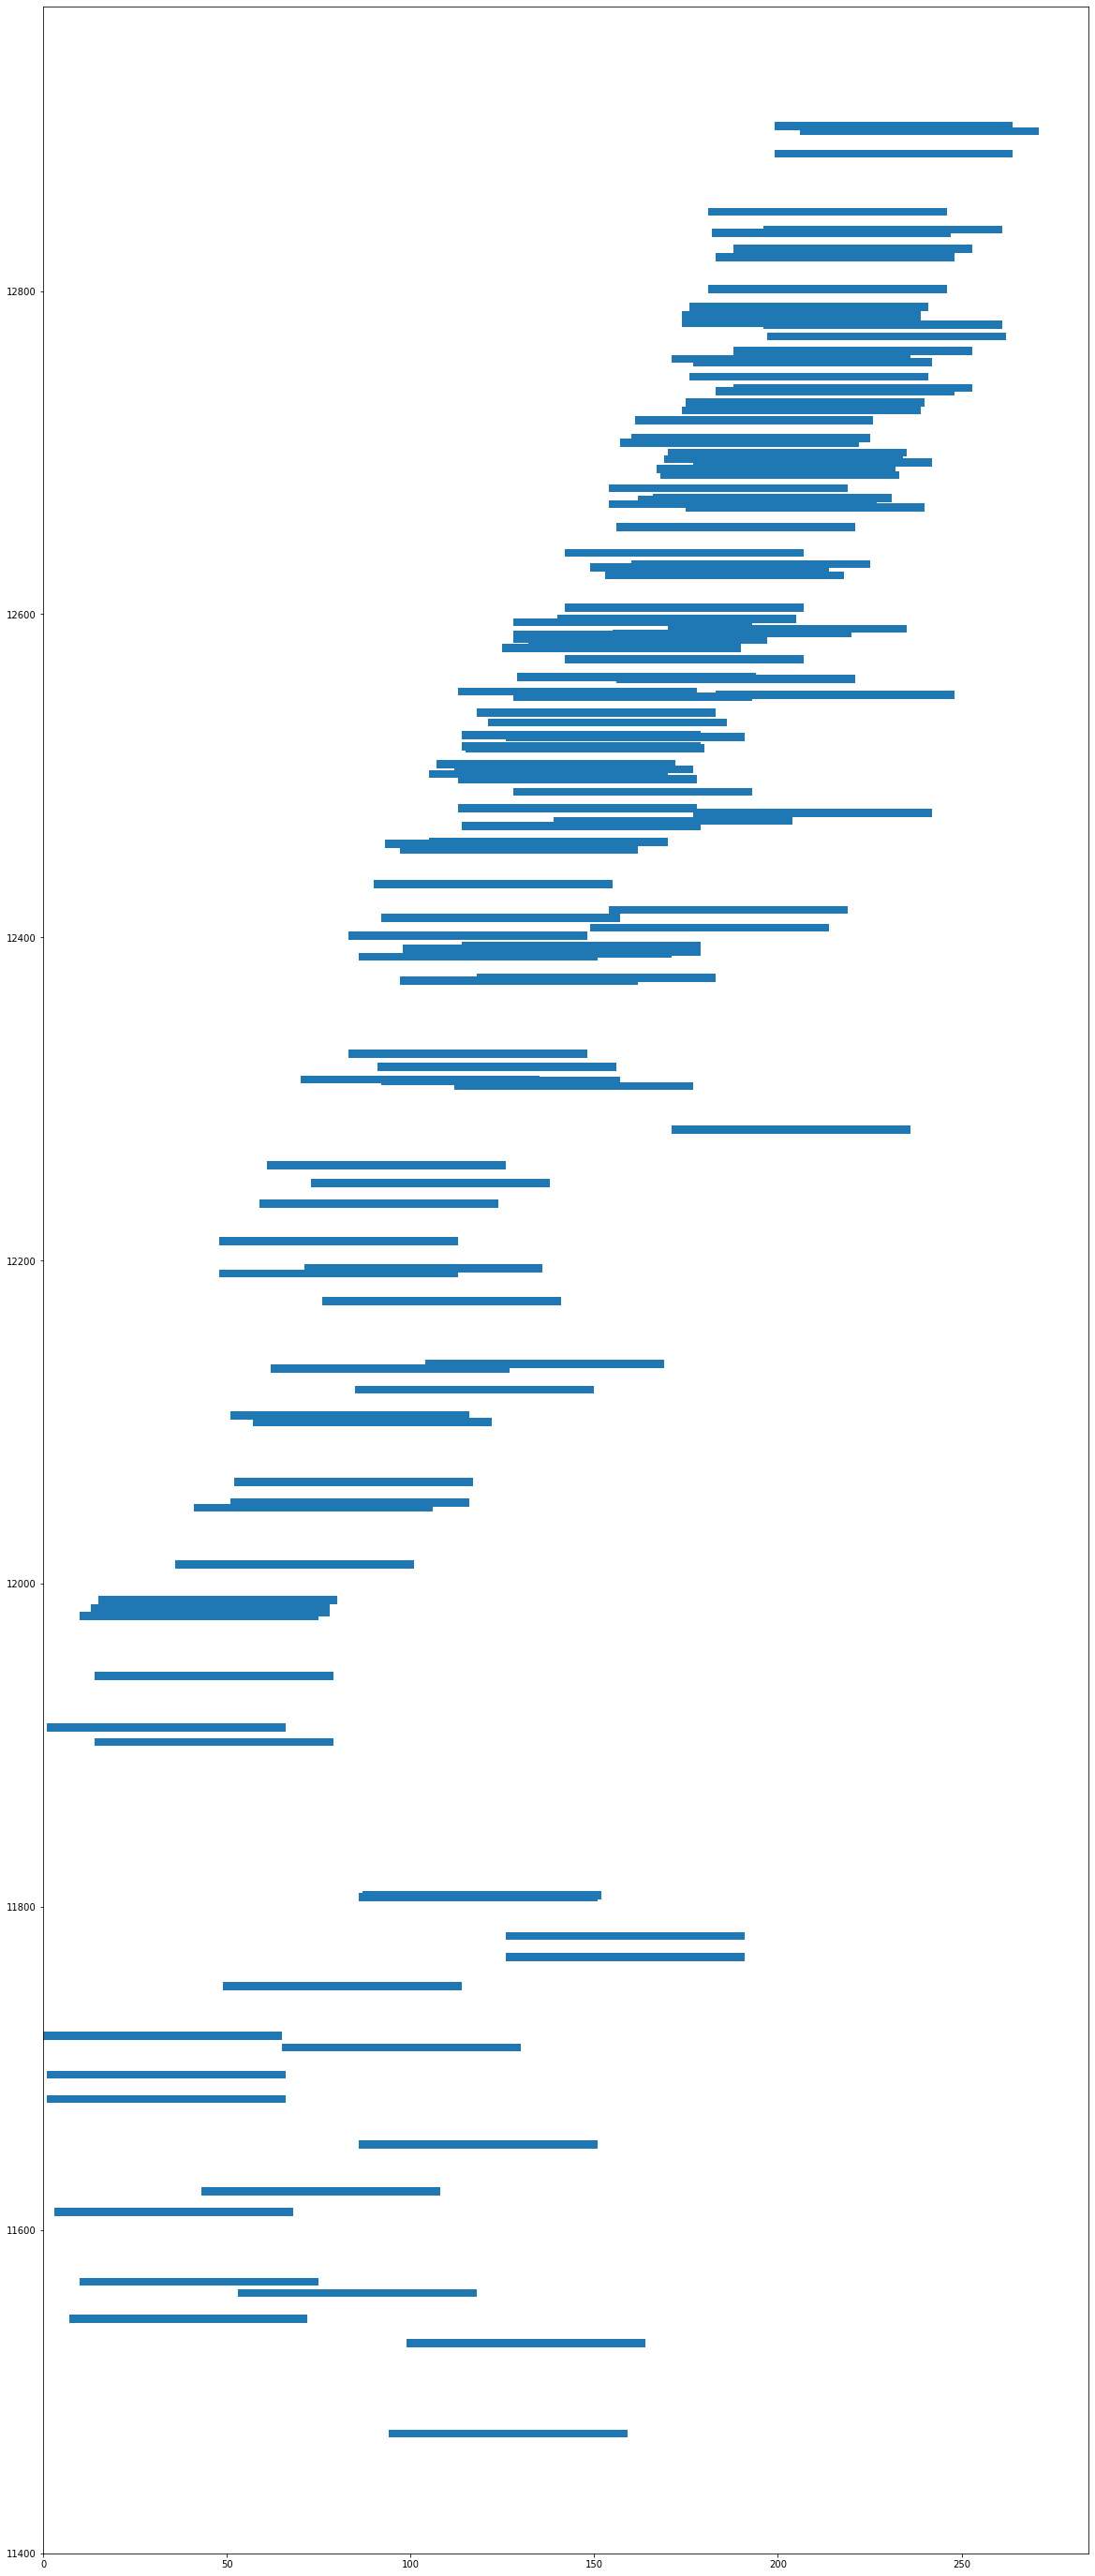

In [15]:

fig, ax = plt.subplots(1, figsize=(20,50))
ax.barh(BP03_df.SubjectID, BP03_df.days_start_to_end, left=BP03_df.start_num, height=5)
plt.show()

**Next: complete your visualization task **

In [16]:
BP03_df_done = BP03_df.query('ISA == "BP03" and Actual_Visit == "Complete"')
subjects = BP03_df_done['SubjectID'].to_numpy()

subject_timezone = df_subject_tzlog[df_subject_tzlog['subject'].isin(subjects)].copy()
subject_timezone

,Site,subject,timestamp_iso,time_offset,timezone_location
0,100,11530,2021-08-25T12:50:30Z,-14400,America/New_York
1,100,11530,2021-09-15T13:27:10Z,-14400,America/New_York
4,100,11806,2021-08-12T13:38:02Z,-14400,America/New_York
5,100,12120,2021-08-11T18:08:50Z,-14400,America/New_York
15,106,12328,2021-08-09T16:03:29Z,-18000,America/Chicago
...,...,...,...,...,...
625,147,12584,2021-09-27T12:36:13Z,-14400,America/New_York
626,147,12584,2021-11-07T06:16:54Z,-18000,America/New_York
627,147,12595,2021-09-23T13:19:06Z,-14400,America/New_York
634,147,12654,2021-10-21T15:43:06Z,-14400,America/New_York


In [17]:
replacement_mapping_dict = {"T": " ", "Z": " "}
subject_timezone.replace({"timestamp_iso":replacement_mapping_dict}, regex = True)

,Site,subject,timestamp_iso,time_offset,timezone_location
0,100,11530,2021-08-25 12:50:30,-14400,America/New_York
1,100,11530,2021-09-15 13:27:10,-14400,America/New_York
4,100,11806,2021-08-12 13:38:02,-14400,America/New_York
5,100,12120,2021-08-11 18:08:50,-14400,America/New_York
15,106,12328,2021-08-09 16:03:29,-18000,America/Chicago
...,...,...,...,...,...
625,147,12584,2021-09-27 12:36:13,-14400,America/New_York
626,147,12584,2021-11-07 06:16:54,-18000,America/New_York
627,147,12595,2021-09-23 13:19:06,-14400,America/New_York
634,147,12654,2021-10-21 15:43:06,-14400,America/New_York


In [18]:
pd.set_option("display.max_columns", 20)
df_combined = pd.merge(BP03_df, df_subject_tzlog, left_on="SubjectID", right_on="subject")

df_combined = df_combined.query('ISA == "BP03" and (Actual_Visit == "Complete" or Actual_Visit == "V1"or Actual_Visit == "V2" or Actual_Visit == "V3" or Actual_Visit == "V4" or Actual_Visit == "V5" or Actual_Visit == "V6" or Actual_Visit == "V7" or Actual_Visit == "V8")')
subjects = df_combined['SubjectID'].to_numpy()


df_combined['timestamp_iso'] = df_combined['timestamp_iso'].map(lambda x: x[:-1])
df_combined[['Date','Time']] = df_combined.timestamp_iso.str.split("T",expand=True)
df_combined = df_combined.drop(['subject', 'timestamp_iso'],axis=1)


df_combined['time_offset'] = df_combined['time_offset'].div(3600)
df_sorted = df_combined.sort_values(by = ['SubjectID', 'Date','Time'], ascending = True)

df_sorted["day_diff"] = 0
df_sorted["time_diff"] = 0

df_sorted_new = df_sorted.loc[(pd.to_datetime(df_sorted["Data_collection_ended"]) > pd.to_datetime(df_sorted["Date"]))]
df_sorted_new = df_sorted_new.reset_index()

for i in df_sorted_new.index:
    if i == 190:
        break
    elif (df_sorted_new["SubjectID"][i] == df_sorted_new["SubjectID"][i+1]):
        string = str(pd.to_datetime(df_sorted_new["Date"][i+1])-pd.to_datetime(df_sorted_new["Data_collection_started"][i]))
        split_string = string.split(" ",1)
        df_sorted_new["day_diff"][i+1] = split_string[0] 
    else:
        df_sorted_new["day_diff"][i+1] = 0

for i in df_sorted_new.index:
    if i == 190:
        break
    elif (df_sorted_new["day_diff"][i] != 'NaN'):
        test = df_sorted_new["Time"][i]
        df_sorted_new["time_diff"][i] = test[:2]
    else:
        df_sorted["time_diff"][i] = 0

df_sorted_new

C:\Users\laure\AppData\Local\Temp\ipykernel_18052\2368297113.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sorted_new["day_diff"][i+1] = 0
C:\Users\laure\AppData\Local\Temp\ipykernel_18052\2368297113.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sorted_new["day_diff"][i+1] = split_string[0]
C:\Users\laure\AppData\Local\Temp\ipykernel_18052\2368297113.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sorted_new

,index,Site_x,SubjectID,ISA,Actual_Visit,Data_collection_started,Data_collection_ended,start_num,end_num,days_start_to_end,Site_y,time_offset,timezone_location,Date,Time,day_diff,time_diff
0,203,132,11474,BP03,Complete,2021-08-20,2021-10-24,94,159,65,132,-5.0,America/Chicago,2021-08-20,17:25:35,0,17
1,3,100,11530,BP03,Complete,2021-08-25,2021-10-29,99,164,65,100,-4.0,America/New_York,2021-08-25,12:50:30,0,12
2,4,100,11530,BP03,Complete,2021-08-25,2021-10-29,99,164,65,100,-4.0,America/New_York,2021-09-15,13:27:10,21,13
3,133,122,11545,BP03,Complete,2021-05-25,2021-07-29,7,72,65,122,-7.0,America/Los_Angeles,2021-05-26,19:51:51,0,19
4,134,122,11545,BP03,Complete,2021-05-25,2021-07-29,7,72,65,122,-5.0,America/Chicago,2021-05-30,15:42:39,5,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,222,142,12836,BP03,V5,2021-11-16,2022-01-20,182,247,65,142,-5.0,America/New_York,2021-11-16,15:15:02,0,15
187,100,113,12838,BP03,V3,2021-11-30,2022-02-03,196,261,65,113,-8.0,America/Los_Angeles,2021-11-30,21:49:39,0,21
188,223,142,12885,BP03,V3,2021-12-03,2022-02-06,199,264,65,142,-5.0,America/New_York,2021-12-03,20:52:23,0,20
189,195,123,12899,BP03,V3,2021-12-10,2022-02-13,206,271,65,123,-8.0,America/Los_Angeles,2021-12-10,18:51:34,0,18


In [19]:

column_names = [str(f"d{i}h{ii}") for i in range(1,67) for ii in range(0,24)]
index_names = pd.Index(df_sorted['SubjectID'].to_numpy())
df_heatmap = pd.DataFrame(columns=column_names, index = index_names.drop_duplicates(keep = 'first') )

for i in (df_sorted_new.index):
    selected_column = "d"+str(int(df_sorted_new["day_diff"][i]+1))+"h"+str(int(df_sorted_new["time_diff"][i]))
    if i == df_sorted_new.shape[0]:
        break
    df_heatmap[selected_column][df_sorted_new["SubjectID"][i]] = df_sorted_new.at[i, "time_offset"].astype(float)

df_heatmap.head(5)

TypeError: can only concatenate str (not "int") to str

In [218]:
pd.set_option("display.max_row", 20)
df_heatmap_final = df_heatmap.ffill(axis = 'columns').bfill(axis = 'columns')



<AxesSubplot:>

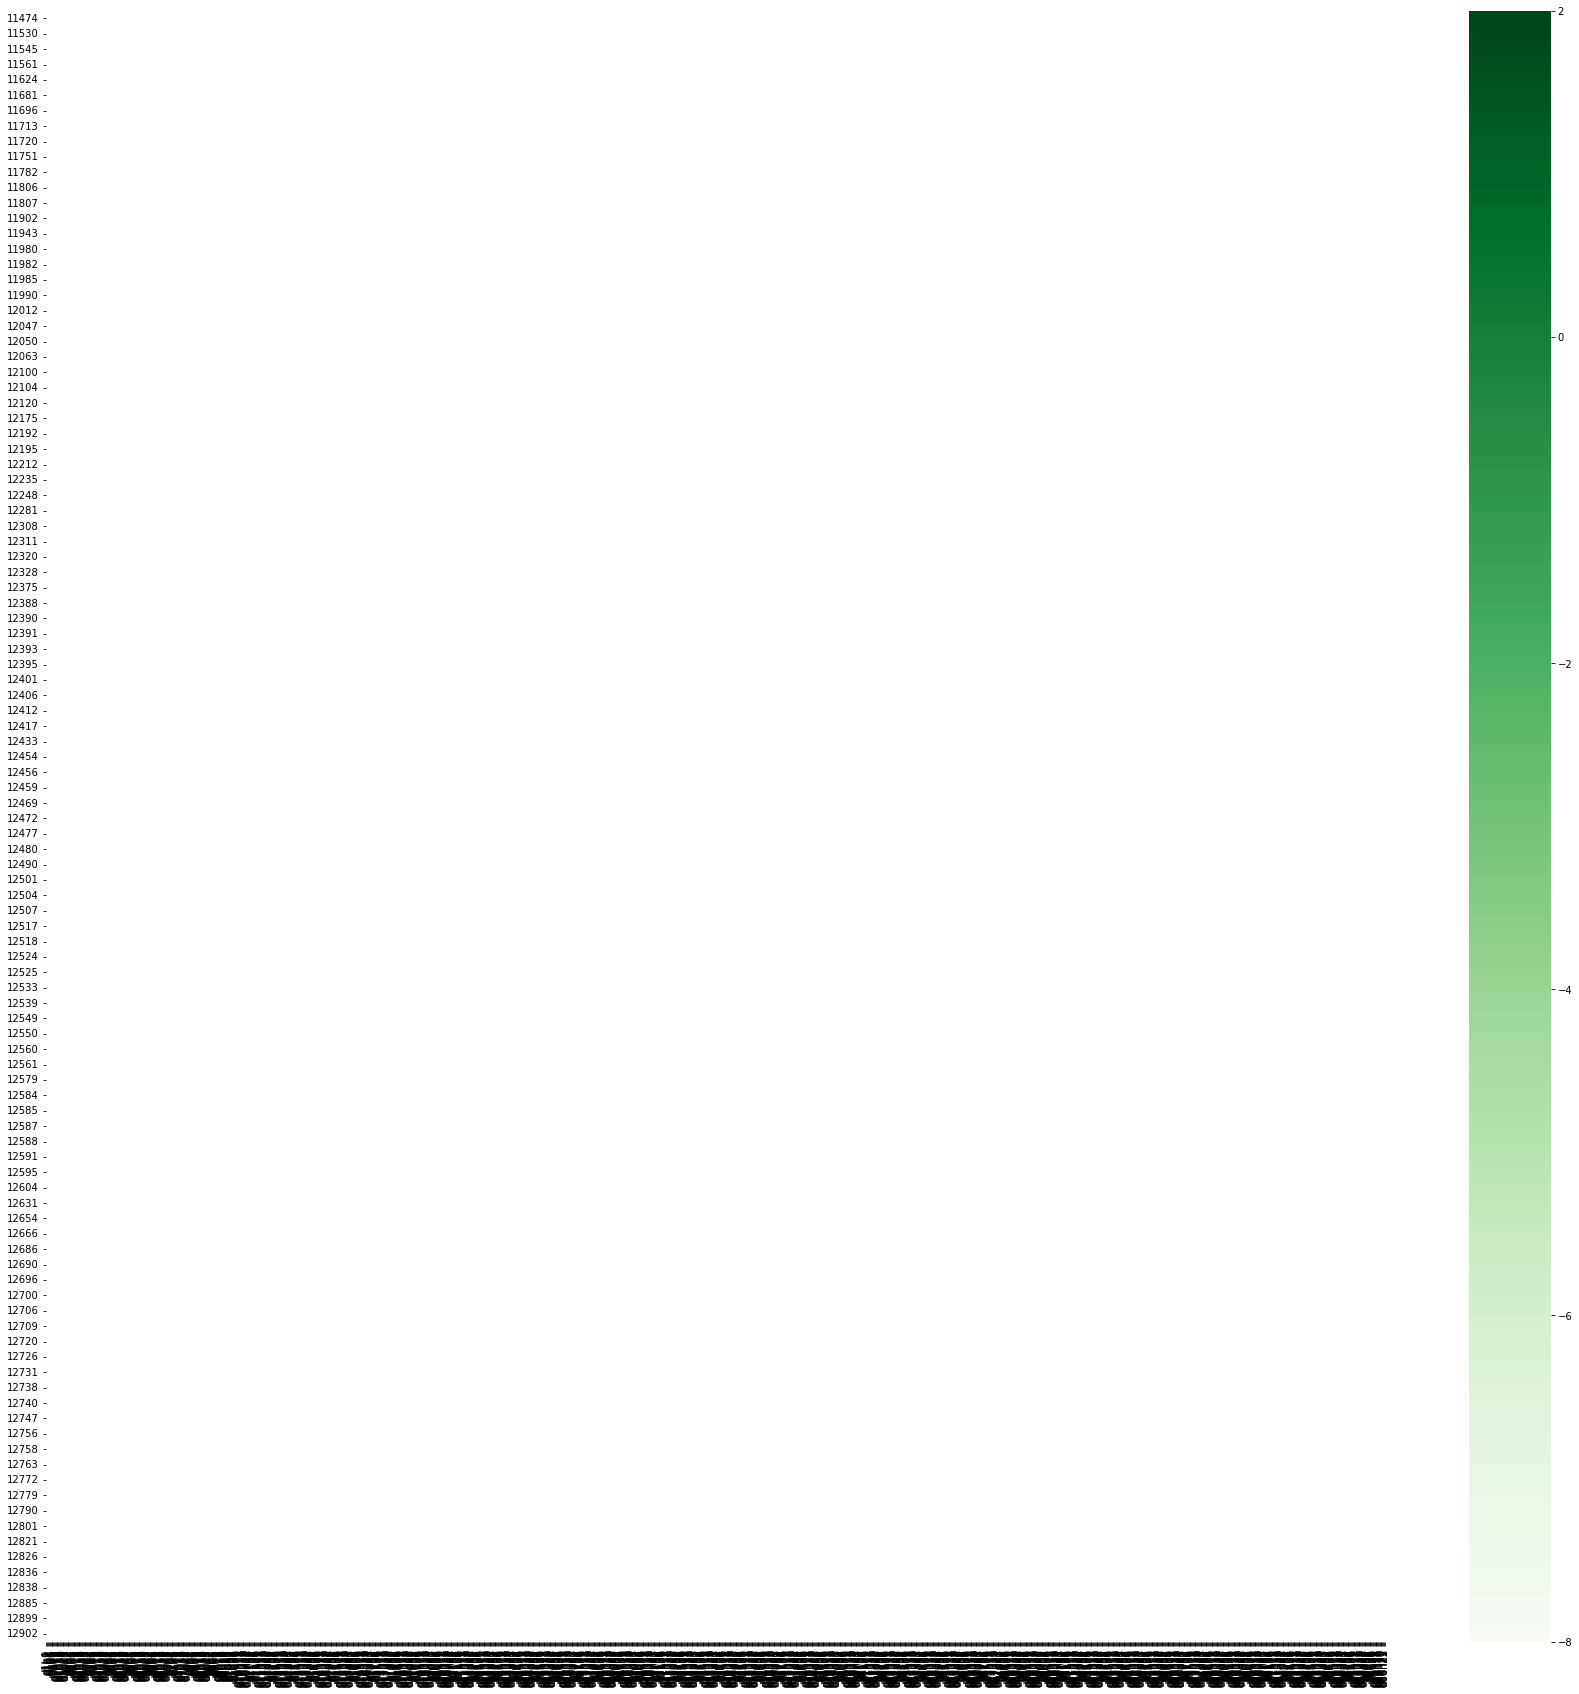

In [219]:
import seaborn as sn
import matplotlib.pyplot as plt

df_heatmap_days = list(df_heatmap_final)
df_heatmap_patient = df_heatmap_final.index.values.tolist()

fig, ax = plt.subplots(figsize= (30,30))
sn.heatmap(df_heatmap_final, cmap='Greens', linewidths = 0.10, yticklabels = df_heatmap_patient, xticklabels = df_heatmap_days)